In [3]:
! pip install --upgrade pip
! pip install -r binder/requirements.txt

     |████████████████████████████████| 1.4MB 712kB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [7]:
from pandas import *
from matplotlib import *
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [53]:
import seaborn as sns
iris = sns.load_dataset('iris')
# iris = pandas.read_csv('iris.csv')
iris.head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
iris.tail(10)

,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,virginica
141,6.9,3.1,5.1,2.3,virginica
142,5.8,2.7,5.1,1.9,virginica
143,6.8,3.2,5.9,2.3,virginica
144,6.7,3.3,5.7,2.5,virginica
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [11]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [15]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [17]:
iris.shape

(150, 5)

In [20]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [33]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

sepal_length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal_width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal_length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal_width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

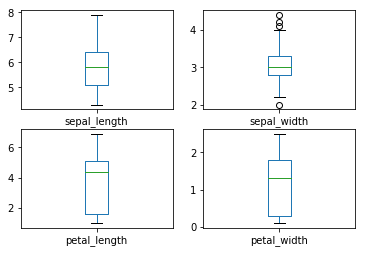

In [50]:
iris.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4456ec59b0>,
      dtype=object)

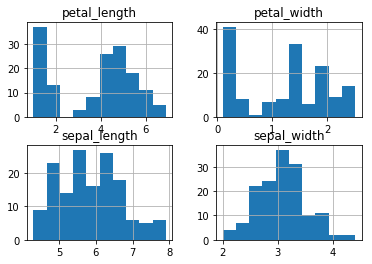

In [51]:
iris.hist()

In [60]:
cat = iris.loc[:,['sepal_length','sepal_width','petal_length','petal_width']]
cat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [59]:
a = iris.iloc[:,0:4]
a.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [79]:
data =a.iloc[0:120,:]
data_spec = iris.iloc[0:120,4]
# c= data.iloc[29:91,:]
left_over = a.iloc[120:,:]
left_spec = iris.iloc[120:,4]
print(data.shape)
print((left_over.shape))
print(data_spec.shape)
print(left_spec.shape)
print(data)
# print(a.values)

(120, 3)
(30, 3)
(120,)
(30,)
     sepal_width  petal_length  petal_width
0            3.5           1.4          0.2
1            3.0           1.4          0.2
2            3.2           1.3          0.2
3            3.1           1.5          0.2
4            3.6           1.4          0.2
5            3.9           1.7          0.4
6            3.4           1.4          0.3
7            3.4           1.5          0.2
8            2.9           1.4          0.2
9            3.1           1.5          0.1
10           3.7           1.5          0.2
11           3.4           1.6          0.2
12           3.0           1.4          0.1
13           3.0           1.1          0.1
14           4.0           1.2          0.2
15           4.4           1.5          0.4
16           3.9           1.3          0.4
17           3.5           1.4          0.3
18           3.8           1.7          0.3
19           3.8           1.5          0.3
20           3.4           1.7          0.2
21

In [80]:
# create training and testing vars
array = iris.values
# excluding the species column, this is what we're predicting!
X = array[:,0:4]
# y is the dependent variable, species
y = array[:,4]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, 
                                y, test_size=0.20, random_state=1)
print(X_train.shape, Y_train.shape)
print(X_validation.shape, Y_validation.shape)

(120, 4) (120,)
(30, 4) (30,)


In [77]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, data, data_spec, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.891667 (0.075000)
LDA: 0.975000 (0.053359)
KNN: 0.975000 (0.038188)
CART: 0.950000 (0.055277)
NB: 0.966667 (0.055277)
SVM: 0.975000 (0.038188)


In [81]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.955909 (0.044337)
LDA: 0.975641 (0.037246)
KNN: 0.950524 (0.040563)
CART: 0.951166 (0.052812)
NB: 0.951166 (0.052812)
SVM: 0.983333 (0.033333)


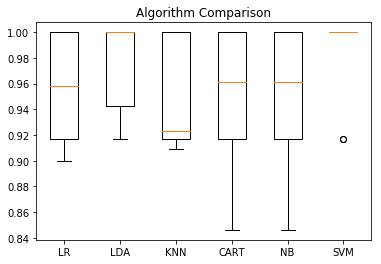

In [82]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [85]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [86]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

